## Transpiler Experiment 

In [8]:
import qiskit as qk 
from IPython.display import display as disp
from IPython.display import Latex 
import numpy as np 
# ibmq_vigo = provider.get_backend('ibmq_vigo')

### Define a Quantu Circuit 

In [9]:
from qiskit.circuit.library import CU1Gate  

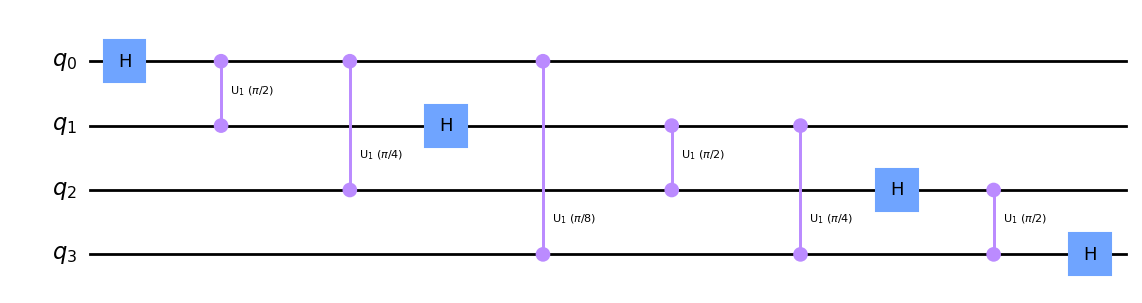

In [10]:
n_qubit = 4
fc = qk.QuantumCircuit(n_qubit, name = "QFT")

for qubit in range(n_qubit):
    fc.h(qubit)
    for o_qubit in range(qubit+1,n_qubit):
        cu1 = CU1Gate(np.pi/(2**(o_qubit-qubit)))
        fc.append(cu1,[o_qubit, qubit])
display(fc.draw(fold=False))
    

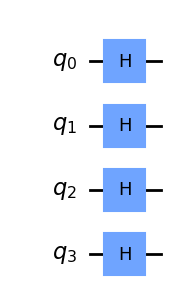

In [11]:
hc = qk.QuantumCircuit(n_qubit)
hc.h(range(n_qubit))
hc.draw()

In [12]:
from qiskit import Aer 
sv_sim  = Aer.get_backend('statevector_simulator')
sv_fourior = sv_sim.run(fc).result().get_statevector()
disp(sv_fourior.draw('latex'))
sv_hadamord = sv_sim.run(hc).result().get_statevector()
disp(sv_hadamord.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

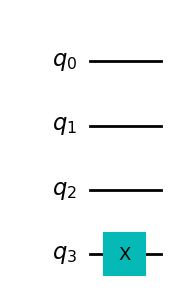

In [13]:
def numeric_state_set( N:int=1 ):
    N = bin(N)[2:]; n = len(N)
    qc = qk.QuantumCircuit(n)
    qc.x([n-i-1 for i,e in enumerate(N)  if int(e) ])
    return qc 
numeric_state_set(8).draw()
    

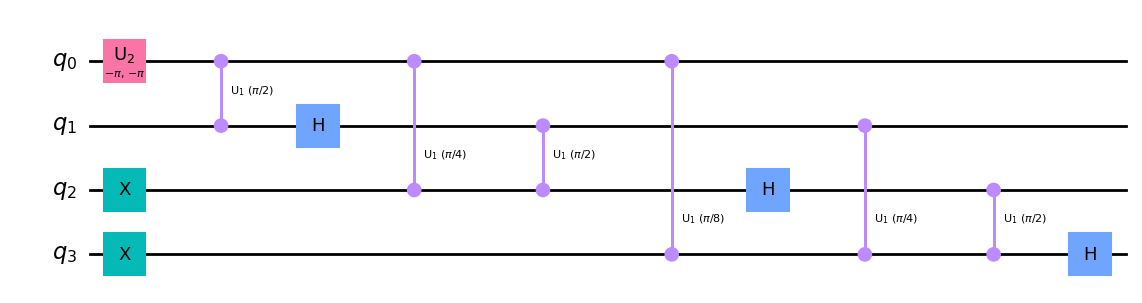

In [34]:
qc = qk.QuantumCircuit(n_qubit)
qc.append(numeric_state_set(13),range(n_qubit))
qc.append(fc,range(n_qubit))
qc.draw()
transpiled_qc = qk.transpile(qc,sv_sim)
transpiled_qc.draw()

In [35]:
sv = sv_sim.run(transpiled_qc).result().get_statevector()
sv.draw('latex')

<IPython.core.display.Latex object>

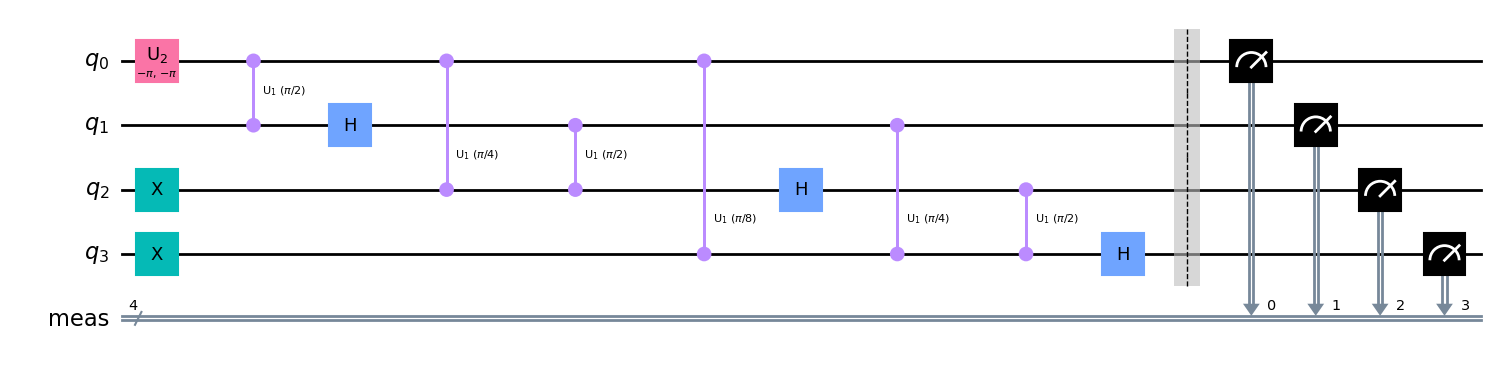

In [37]:

# qc.measure_all()
transpiled_qc.measure_all()
transpiled_qc.draw(fold=False )

In [27]:
from qiskit import Aer 
from qiskit.visualization import plot_histogram
qasm_sim = Aer.get_backend('qasm_simulator')

# Simulation 1 
job_1 = qasm_sim.run(qk.transpile(qc,qasm_sim))
disp(job.status()) 
result_1 = job_1.result()
count_1  = result_1.get_counts()

# Simulation 2 

job_2 = qasm_sim.run(qk.transpile(qc,qasm_sim))
disp(job.status()) 
result_2 = job_2.result()
count_2  = result_2.get_counts()



<JobStatus.DONE: 'job has successfully run'>

<JobStatus.DONE: 'job has successfully run'>

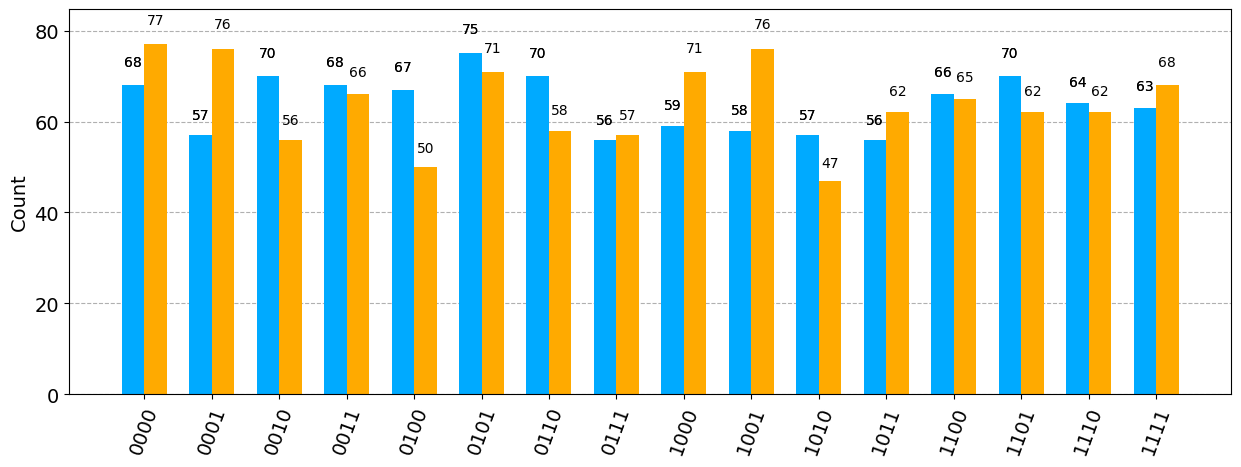

In [53]:
plot_histogram([count_1,count_2],figsize = (15,5) , color=['#00aaff','#ffaa00'])

In [18]:
from qiskit import IBMQ 
# IBMQ.save_account('fc2816d52da253af8078aa0f5b1ae29ceaede256f4e913bfcbd37f68ae6966e0ef41d85c3ef0fefd0e4958a7774f2f392026de2855617e76e3105b2dbc90c1cd',overwrite=True)
provider = IBMQ.load_account()
ibm_brisbane = provider.get_backend('ibm_brisbane')

/tmp/ipykernel_59/3273498498.py:3: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.load_account()
/tmp/ipykernel_59/3273498498.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


Traceback (most recent call last):
  Cell In[18], line 3
    provider = IBMQ.load_account()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/ibmqfactory.py:191 in load_account
    self._initialize_providers(credentials, preferences)
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/ibmqfactory.py:456 in _initialize_providers
    auth_client = AuthClient(credentials.token,
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/api/clients/auth.py:41 in __init__
    self.base_api = self._init_service_clients(**request_kwargs)
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/api/clients/auth.py:53 in _init_service_clients
    access_token = self._request_access_token()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/api/clients/auth.py:75 in _request_access_token
    response = self.auth_api.login(self.api_token)
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/api/rest/root.p

In [ ]:
ibm_brisbane


In [ ]:
disp(ibm_brisbane)
disp(ibm_brisbane.status())
disp(ibm_brisbane)

In [ ]:
brisbane_transpiled_circuit = qk.transpile(qc,ibm_brisbane)
brisbane_transpiled_circuit.draw(fold=False )

In [ ]:
job = ibm_brisbane.run(brisbane_transpiled_circuit)
job.status()

In [ ]:
job.status()